In [1]:
f_func <- "./functions.ipynb"
eval(parse(text = system2('jupyter', c('nbconvert', f_func, '--to=script', '--stdout'), stdout = TRUE)))

f_data_loading <- "./data_loading.ipynb"
eval(parse(text = system2('jupyter', c('nbconvert', f_data_loading, '--to=script', '--stdout'), stdout = TRUE)))

Loading required package: Rsamtools

Loading required package: GenomeInfoDb

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min


Loading required package: S4Vectors

Loading required package: stats4


Attaching package: ‘S4Vectors’


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: GenomicRanges

Loading required package: Biostrings



Warning message:
“no DISPLAY variable so Tk is not available”
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Loaded TSdist v3.7.1. See ?TSdist for help, citation("TSdist") for use in publication.


Loading required package: dtplyr

Loading required package: profvis

Loading required package: ggforce

Loading required package: pracma


Attaching package: ‘pracma’


The following object is masked from ‘package:purrr’:

    cross


The following object is masked from ‘package:Hmisc’:

    ceil


Loading required package: rstatix


Attaching package: ‘rstatix’


The following object is masked from ‘package:IRanges’:

    desc


The following object is masked from ‘package:stats’:

    filter


Loading required package: ggpubr

Loading required package: jsonlite


Attaching package: ‘jsonlite’


The following object is masked from ‘package:R.utils’:

    validate


The following object is masked from ‘package:purrr’:

    flatten


Loading

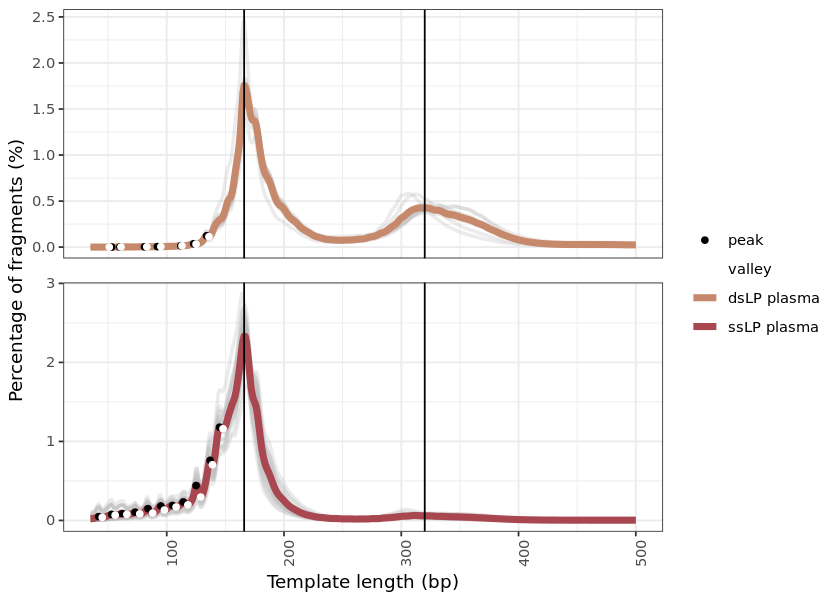

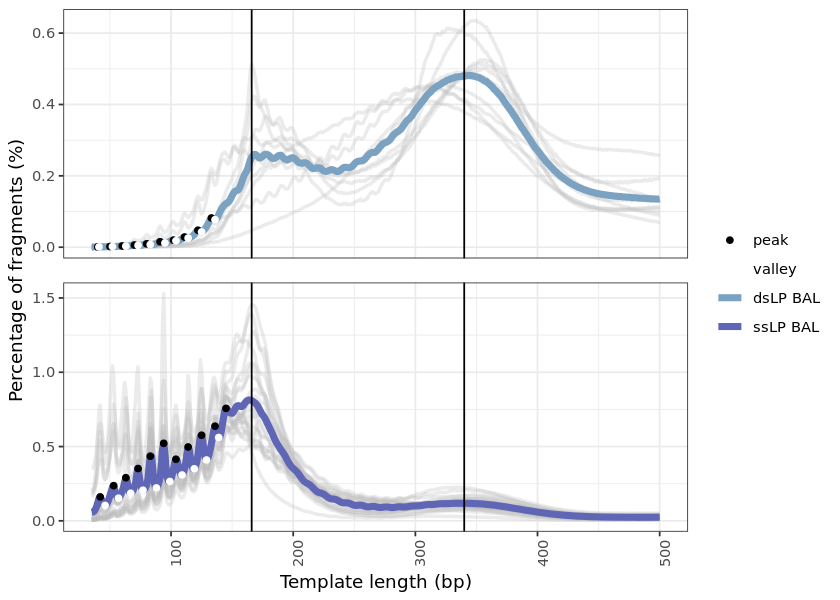

In [26]:
options(repr.plot.width=7, repr.plot.height=5)
for(sel_sample in c("plasma", "BAL")){
    peaks.valleys <- rbind(
        get_index_for_valley(host_nonMT_summarized, sample_type_tmp = paste0("ssLP ", sel_sample))[[1]],
        get_index_for_valley(host_nonMT_summarized, sample_type_tmp = paste0("dsLP ", sel_sample))[[1]]
    ) #%>% filter(type == "peak")

    host_nonMT_length_all <- host_nonMT %>% 
        filter(sample == sel_sample) %>% 
        ggplot() + 
            geom_line(aes(x = TLEN, y = nsCount, group = sample_id, col = type), alpha = 0.3, size = 1, col = "grey") + 
            facet_grid(rows = vars(sample_type), drop = TRUE, scales = "free") +
            geom_line(data = . %>% group_by(TLEN, sample_type, type) %>% 
                      summarise(mnsCount = mean(nsCount, na.rm = TRUE), .groups = "keep"), 
                aes(x = TLEN, y = mnsCount, col = sample_type), size = 2) +
            geom_point(data = peaks.valleys, 
                       aes(x=TLEN, y = mnsCount, col = type)) +
            #layout
            scale_color_manual(values = c("dsLP plasma" = "#C6896C", "ssLP plasma" = "#A84750", 
                                         "dsLP BAL" = "#7CA2C2", "ssLP BAL" = "#6066B6", 
                                         "valley" = "white", "peak" = "black"), 
                              breaks = c("peak", "valley", "dsLP plasma", "ssLP plasma", "dsLP BAL", "ssLP BAL")) + 

            ylab("Percentage of fragments (%)") + xlab("Template length (bp)") + 
            theme_bw() + 
            theme(axis.text.x = element_text(angle = 90, hjust = 1), 
                            strip.background = element_rect(color = "white", fill = "white"), 
                            strip.text.x = element_text(size = 7), 
                            panel.spacing = unit(1, "lines"), 
                            strip.text.y = element_blank()) + 
            labs(color = "")
    if (sel_sample == "plasma"){ print(host_nonMT_length_all + geom_vline(xintercept = c(320, 166))) }
    if (sel_sample == "BAL"){ print(host_nonMT_length_all + geom_vline(xintercept = c(166, 340))) }

    ggsave(paste0("../../output_figures/host_nonMT_", sel_sample, "_length_all.png"), plot = host_nonMT_length_all, 
               width = 7, height = 5)
    ggsave(paste0("../../output_figures/host_nonMT_", sel_sample, "_length_all.pdf"), plot = host_nonMT_length_all, 
               width = 7, height = 5)
}

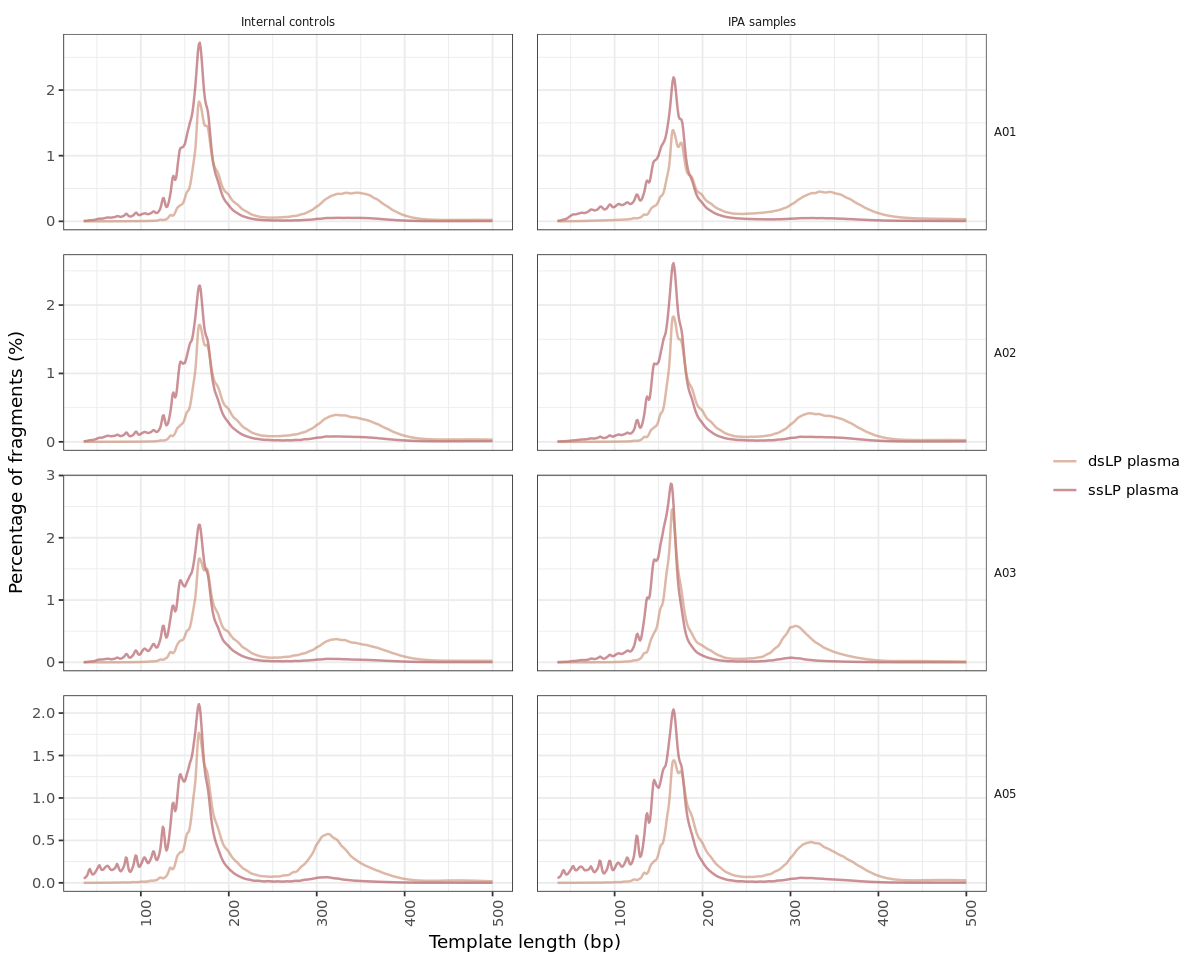

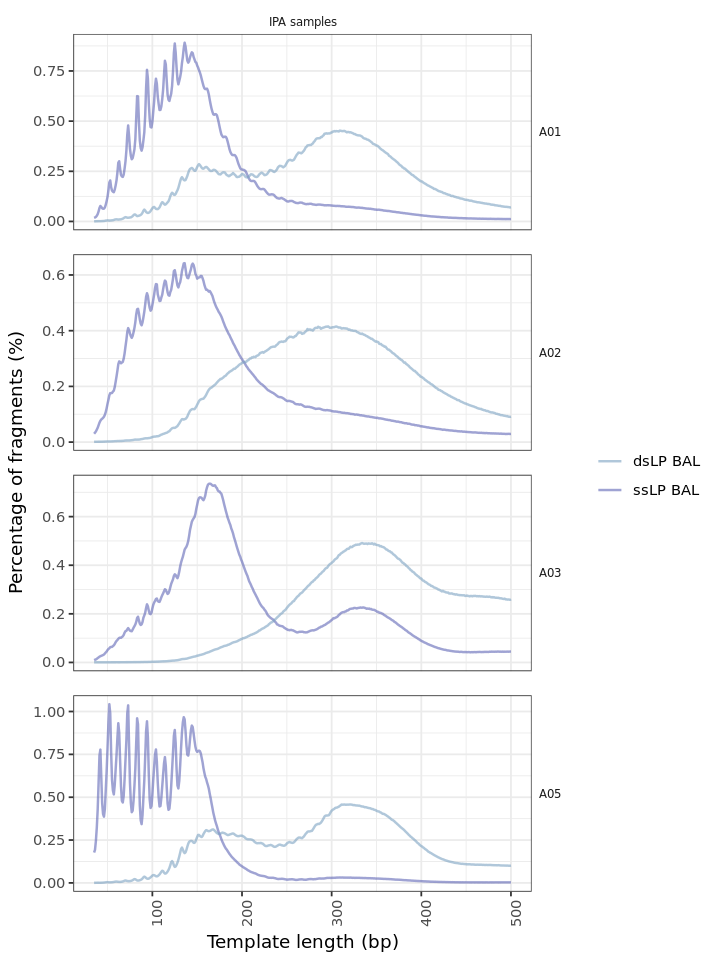

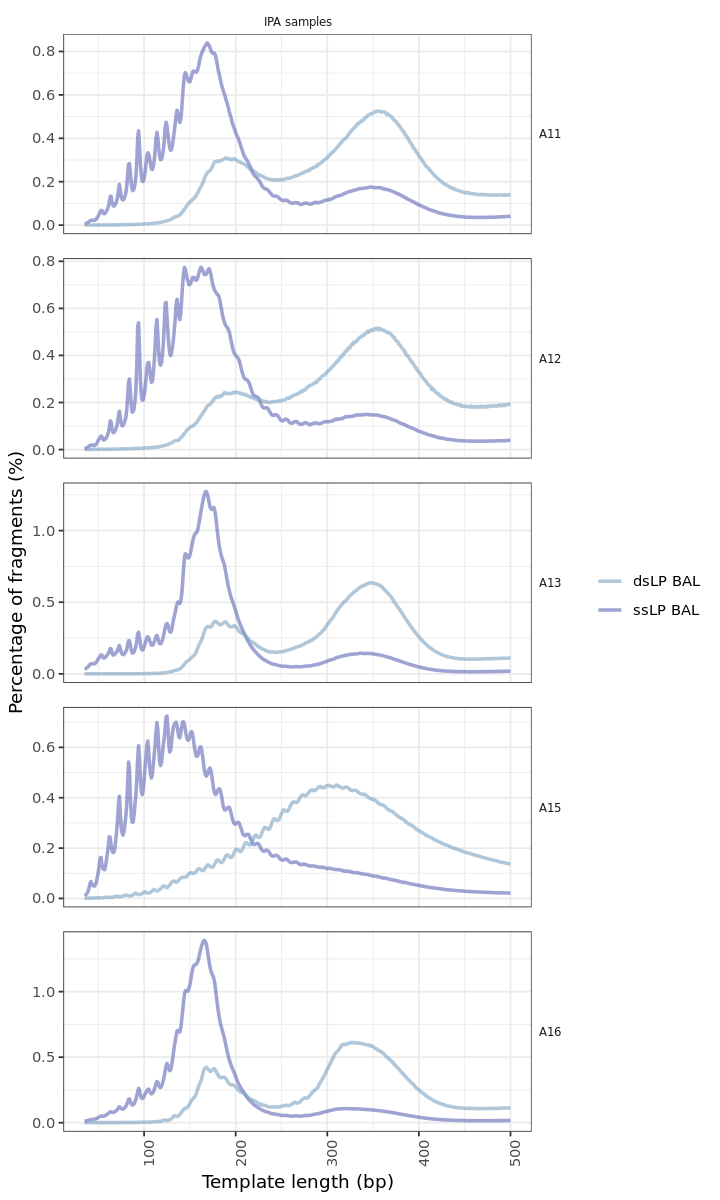

In [3]:
options(repr.plot.width=10, repr.plot.height=8)
host_nonMT_plasma_length_A01.05 <- host_nonMT %>%
    filter(sample == "plasma") %>% 
    mutate(sample_id_short = gsub("K$", "", sample_id)) %>% 
    mutate(sample_id_shorter = substr(sample_id, 1, 3)) %>% 
    filter(substr(sample_id, 1, 3) %in% c("A01", "A02", "A03", "A05", "A11", "A12", "A13", "A15", "A16")) %>%
    filter(startsWith(sample_id_short, "A")) %>% 
    filter(sample_id_short %nin% c("A05PaspVAL", "A05Pctrl2", "A05Pctrl3")) %>% 
    ggplot() + 
        geom_line(aes(x = TLEN, y = nsCount, group = sample_id, col = sample_type), alpha = 0.6, size = 0.7) + 
        facet_grid(cols = vars(origin), rows = vars(sample_id_shorter), drop = TRUE, scales = "free") +
        #layout
        scale_color_manual(values = c("dsLP plasma" = "#C6896C", "ssLP plasma" = "#A84750", 
                                     "dsLP BAL" = "#7CA2C2", "ssLP BAL" = "#6066B6")) + 
        ylab("Percentage of fragments (%)") + xlab("Template length (bp)") + 
        theme_bw() + 
        theme(axis.text.x = element_text(angle = 90, hjust = 1), 
                        strip.background = element_rect(color = "white", fill = "white"), 
                        strip.text.x = element_text(size = 7), 
                        panel.spacing = unit(1, "lines"), 
                        strip.text.y = element_text(angle = 0, size = 7, hjust = 0)) + 
        labs(color = "")

host_nonMT_plasma_length_A01.05
ggsave(paste0("../../output_figures/host_nonMT_plasma_length_A01.05.png"), plot = host_nonMT_plasma_length_A01.05, 
           width = 10, height = 8)
ggsave(paste0("../../output_figures/host_nonMT_plasma_length_A01.05.pdf"), plot = host_nonMT_plasma_length_A01.05, 
           width = 10, height = 8)


options(repr.plot.width=6, repr.plot.height=8)
host_nonMT_BAL_length_A01.05 <- host_nonMT %>%
    filter(sample == "BAL") %>% 
    mutate(sample_id_short = gsub("K$", "", sample_id)) %>% 
    mutate(sample_id_shorter = substr(sample_id, 1, 3)) %>% 
    filter(substr(sample_id, 1, 3) %in% c("A01", "A02", "A03", "A05")) %>%
    filter(startsWith(sample_id_short, "A")) %>% 
    filter(sample_id_short %nin% c("A05PaspVAL", "A05Pctrl2", "A05Pctrl3")) %>% 
    ggplot() + 
        geom_line(aes(x = TLEN, y = nsCount, group = sample_id, col = sample_type), alpha = 0.6, size = 0.7) + 
        facet_grid(cols = vars(origin), rows = vars(sample_id_shorter), drop = TRUE, scales = "free") +
        #layout
        scale_color_manual(values = c("dsLP plasma" = "#C6896C", "ssLP plasma" = "#A84750", 
                                     "dsLP BAL" = "#7CA2C2", "ssLP BAL" = "#6066B6")) + 
        ylab("Percentage of fragments (%)") + xlab("Template length (bp)") + 
        theme_bw() + 
        theme(axis.text.x = element_text(angle = 90, hjust = 1), 
                        strip.background = element_rect(color = "white", fill = "white"), 
                        strip.text.x = element_text(size = 7), 
                        panel.spacing = unit(1, "lines"), 
                        strip.text.y = element_text(angle = 0, size = 7, hjust = 0)) + 
        labs(color = "")

host_nonMT_BAL_length_A01.05
ggsave(paste0("../../output_figures/host_nonMT_BAL_length_A01.05.png"), plot = host_nonMT_BAL_length_A01.05, 
           width = 6, height = 8)
ggsave(paste0("../../output_figures/host_nonMT_BAL_length_A01.05.pdf"), plot = host_nonMT_BAL_length_A01.05, 
           width = 6, height = 8)

options(repr.plot.width=6, repr.plot.height=10)
host_nonMT_BAL_length_A11.16 <- host_nonMT %>%
    filter(sample == "BAL") %>% 
    mutate(sample_id_short = gsub("K$", "", sample_id)) %>% 
    mutate(sample_id_shorter = substr(sample_id, 1, 3)) %>% 
    filter(substr(sample_id, 1, 3) %in% c("A11", "A12", "A13", "A15", "A16")) %>%
    filter(startsWith(sample_id_short, "A")) %>% 
    filter(sample_id_short %nin% c("A05PaspVAL", "A05Pctrl2", "A05Pctrl3")) %>% 
    ggplot() + 
        geom_line(aes(x = TLEN, y = nsCount, group = sample_id, col = sample_type), alpha = 0.6, size = 1) + 
        facet_grid(cols = vars(origin), rows = vars(sample_id_shorter), drop = TRUE, scales = "free") +
        #layout
        scale_color_manual(values = c("dsLP plasma" = "#C6896C", "ssLP plasma" = "#A84750", 
                                     "dsLP BAL" = "#7CA2C2", "ssLP BAL" = "#6066B6")) + 
        ylab("Percentage of fragments (%)") + xlab("Template length (bp)") + 
        theme_bw() + 
        theme(axis.text.x = element_text(angle = 90, hjust = 1), 
                        strip.background = element_rect(color = "white", fill = "white"), 
                        strip.text.x = element_text(size = 7), 
                        panel.spacing = unit(1, "lines"), 
                        strip.text.y = element_text(angle = 0, size = 7, hjust = 0)) + 
        labs(color = "")

host_nonMT_BAL_length_A11.16
ggsave(paste0("../../output_figures/host_nonMT_BAL_length_A11.16.png"), plot = host_nonMT_BAL_length_A11.16, 
           width = 6, height = 10)
ggsave(paste0("../../output_figures/host_nonMT_BAL_length_A11.16.pdf"), plot = host_nonMT_BAL_length_A11.16, 
           width = 6, height = 10)